### transformer的变体
#### 架构
 - 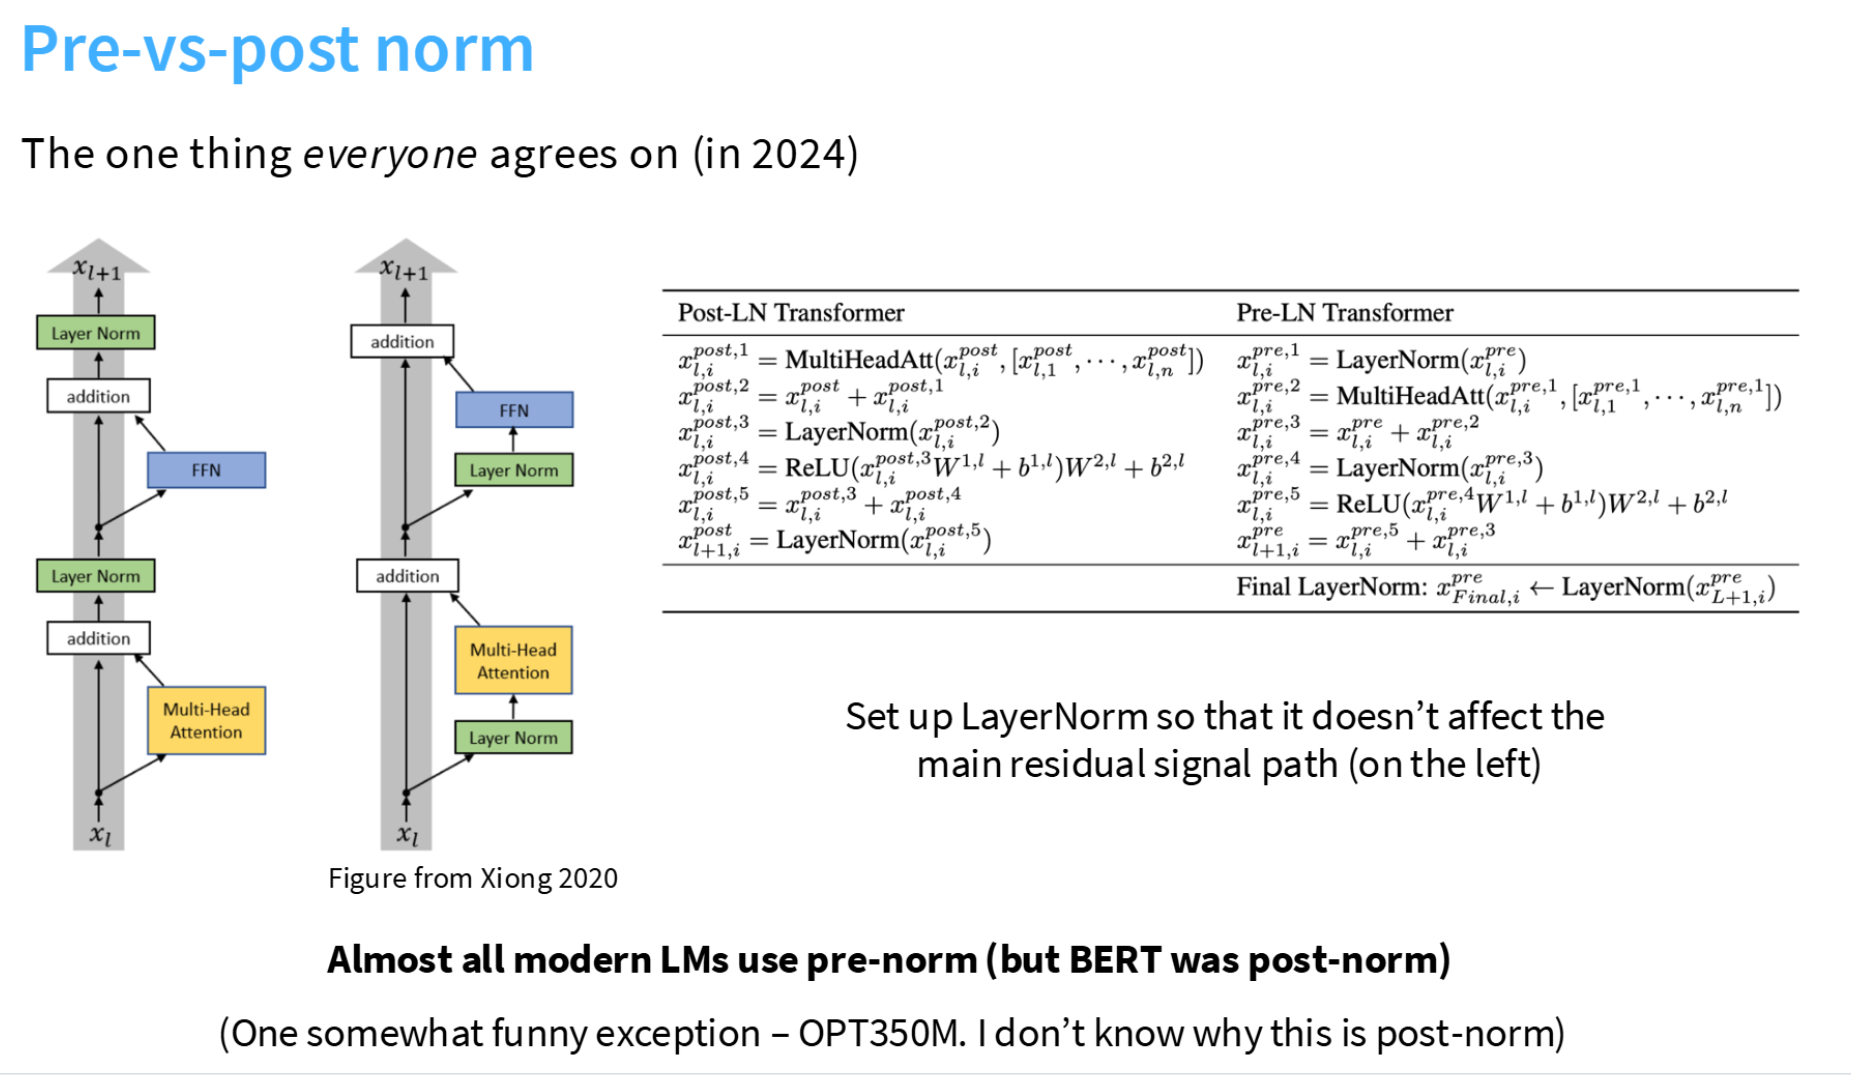
 - 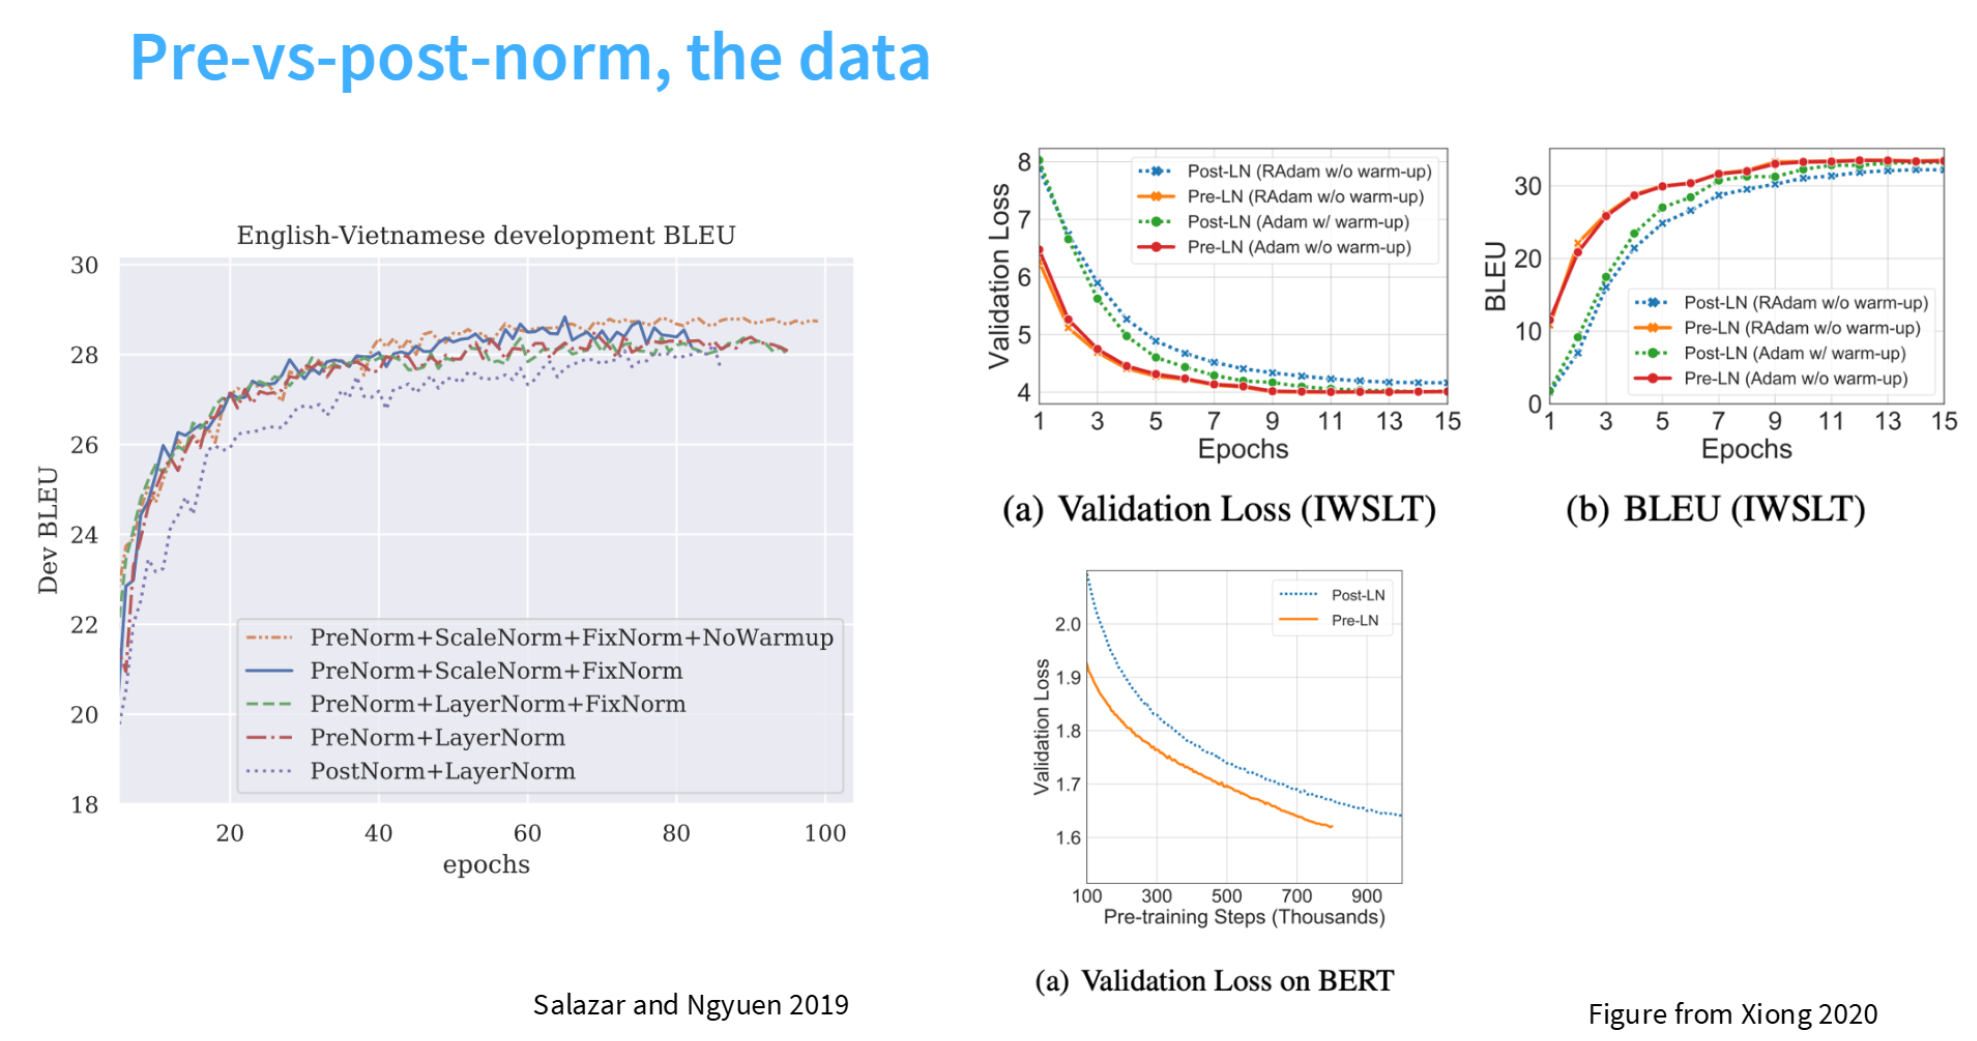
**Pre-Norm（预归一化）**
工作顺序：
1. LayerNorm → 
2. Attention 或 Feed-forward → 
3. Residual Connection（残差连接）
优势：
 - 在梯度反向传播时，梯度的稳定性通常较好，因为归一化层能确保输入在每一层都有相对均匀的分布。
 - **训练稳定性较高**，尤其是在深层网络中，训练过程中的梯度爆炸/消失问题得到缓解。

#### 另一种形式：用两个layernorm
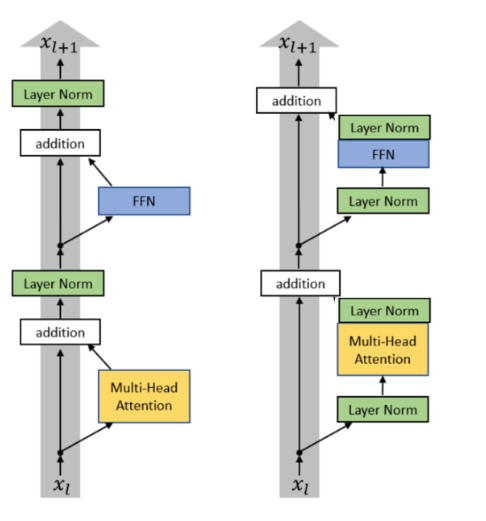

### LayerNorm to RMSNorm
 - RMSNorm相比于LayerNorm的优势在于在计算的时候不用计算均值，减去均值,但是同样可以有好的性能，而且在实验中还表现出更小的loss
 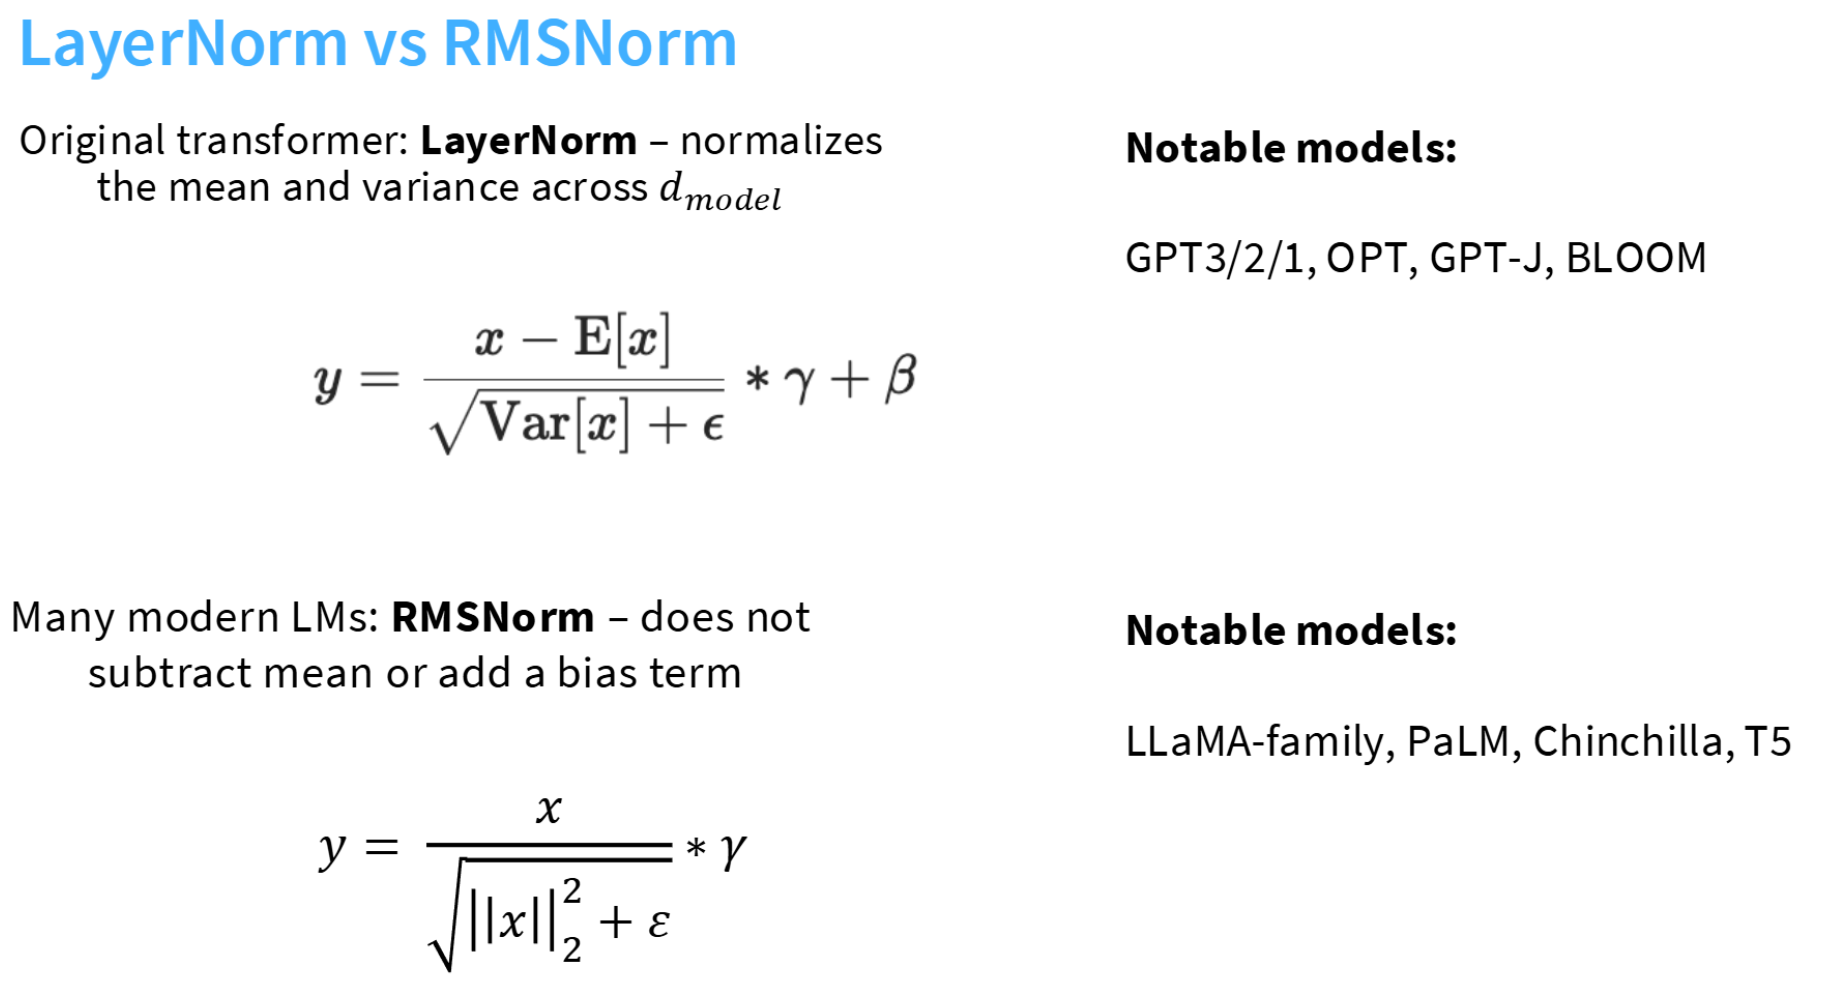
 - 所谓的性能提升体现在哪里呢？
    - 在下面这张图中可以看出，有99.8%的flop都被花在了matrix计算上，花在norm中的时间并不多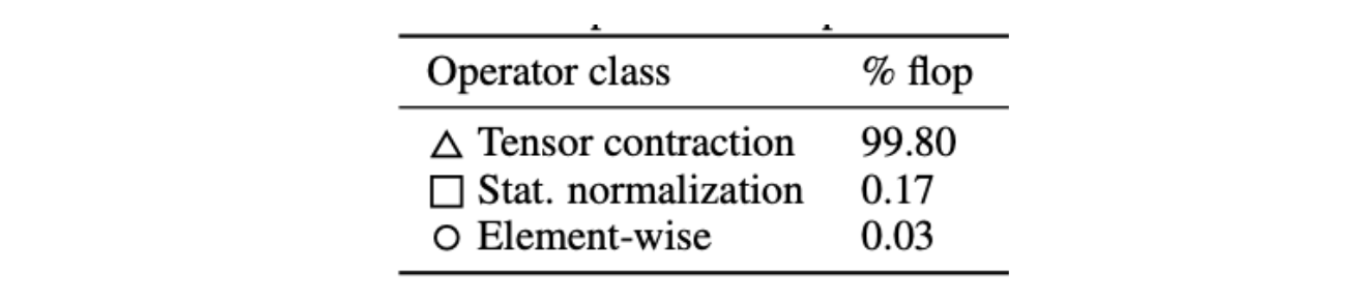
    - 但是FLOPS并不能代表运行时间，还要考虑data Move（内存移动），所有在runtime中norm的占比还是很大的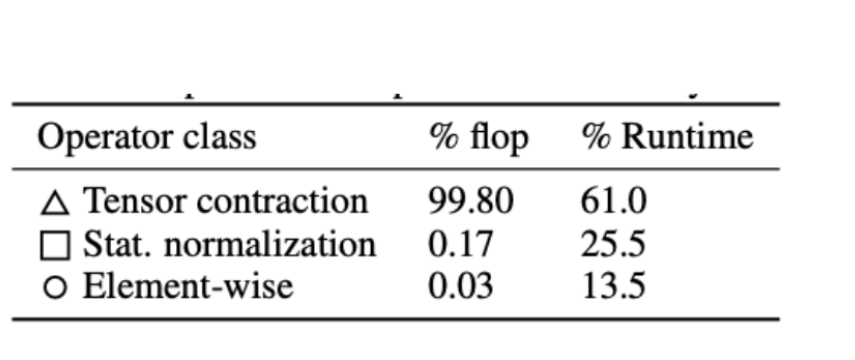

### 取消bias term
 - 减少计算，只要使用矩阵乘法
 - 提高稳定性
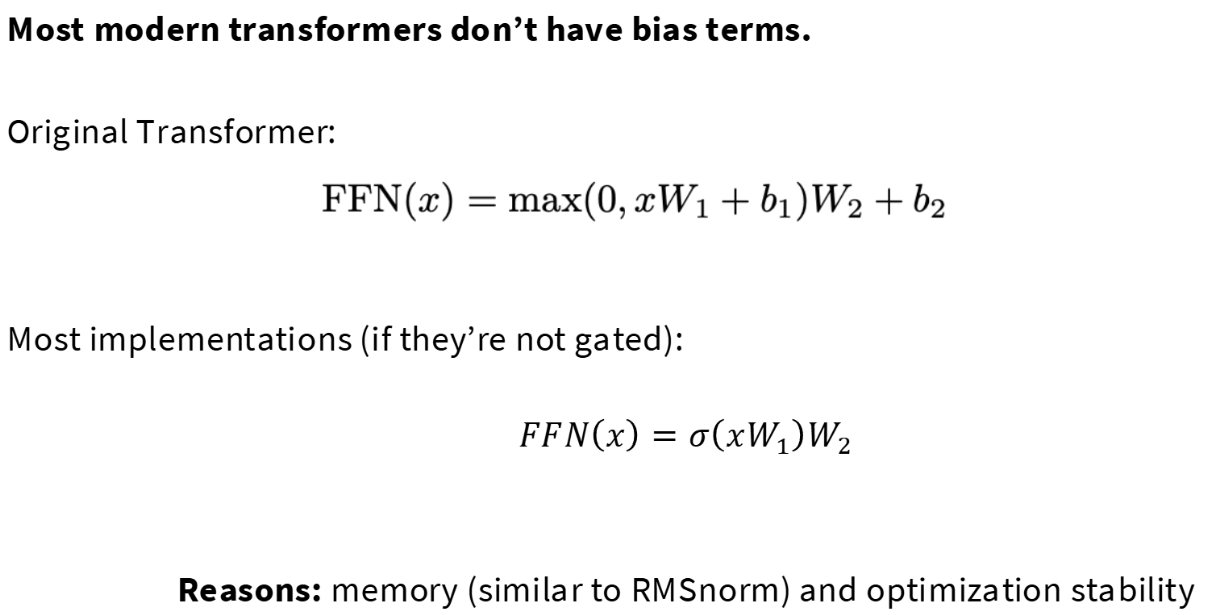

### activation的选择
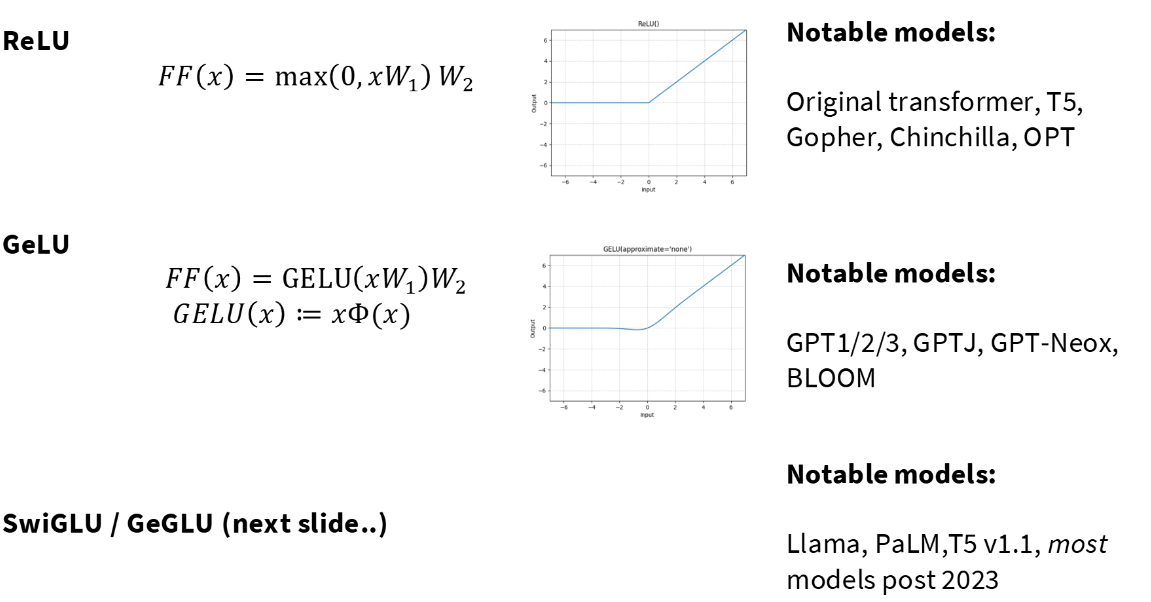
### 目前大多数人使用的：*GLU
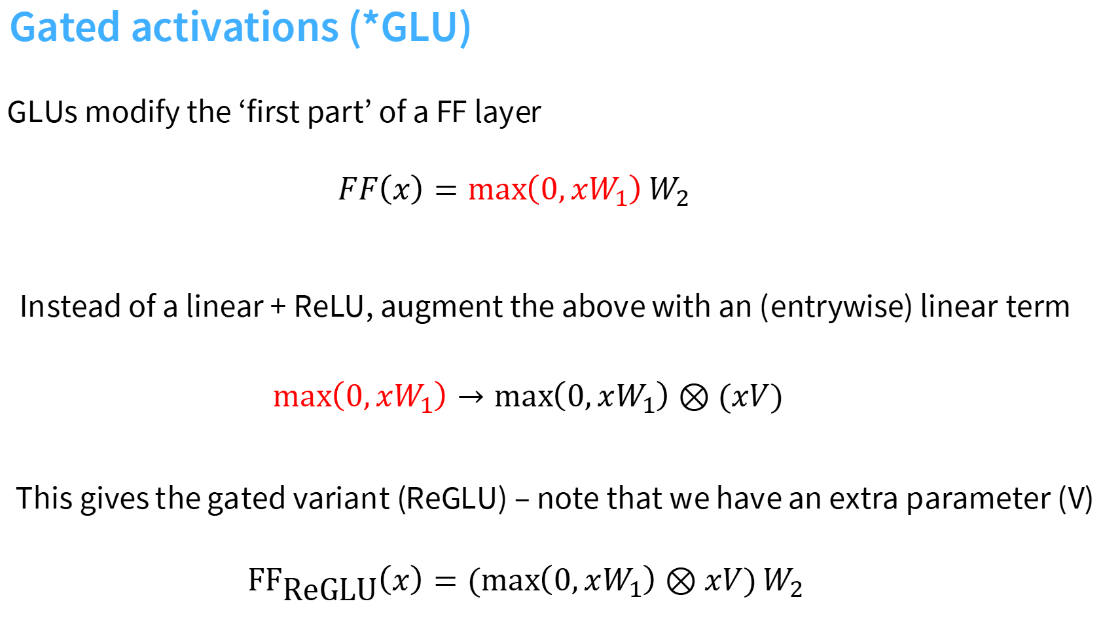
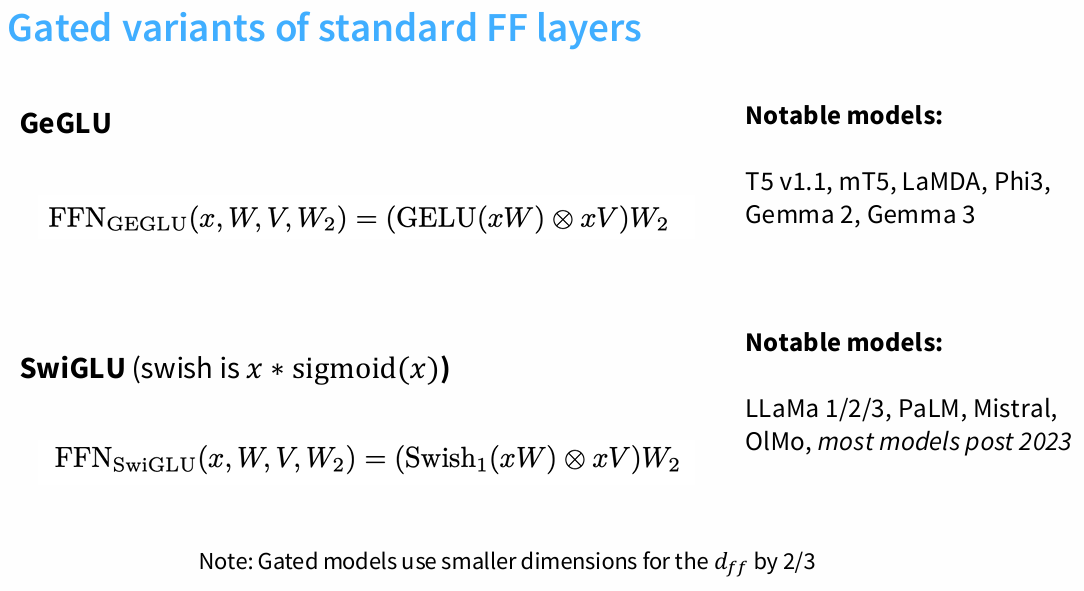

### parallel layers
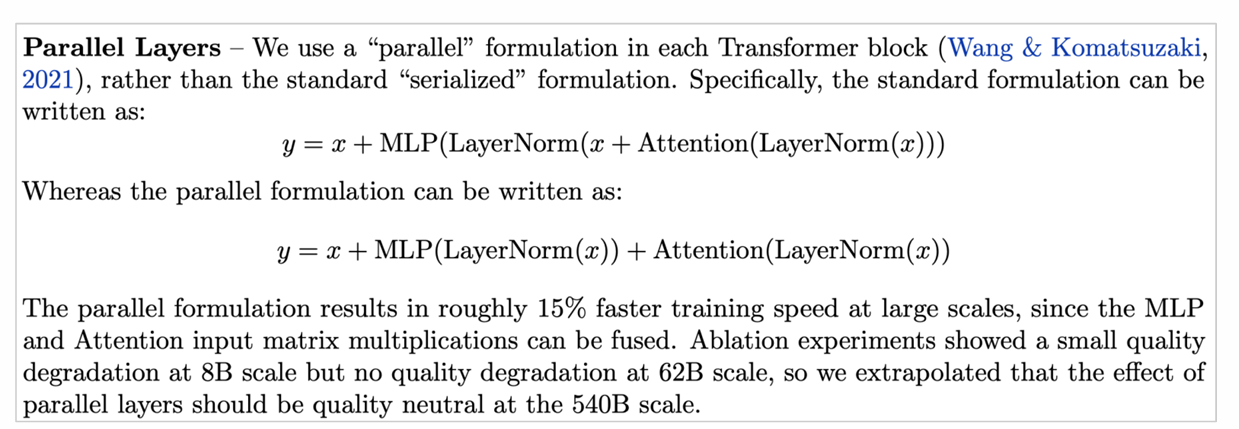

### position embedding的变体——RoPE
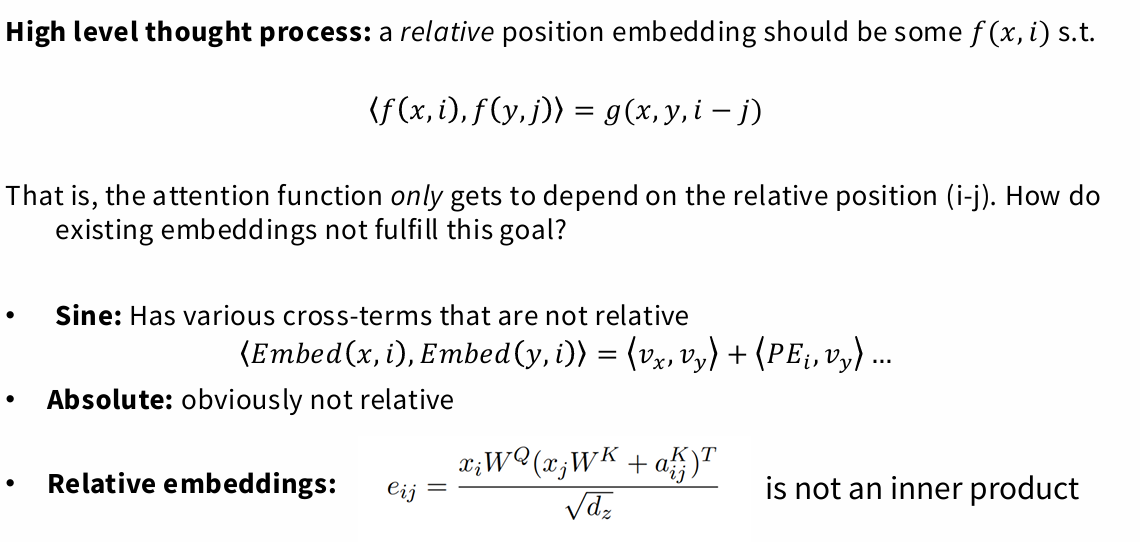
 - f(x,i)中x是当前值，i是位置（图上的公式要求两次词需要满足**相对位置不变性**），并且两者之间的关系可以写成**内积的形式**，相比于下面的这些，RoPE不会泄漏绝对位置信息
 - 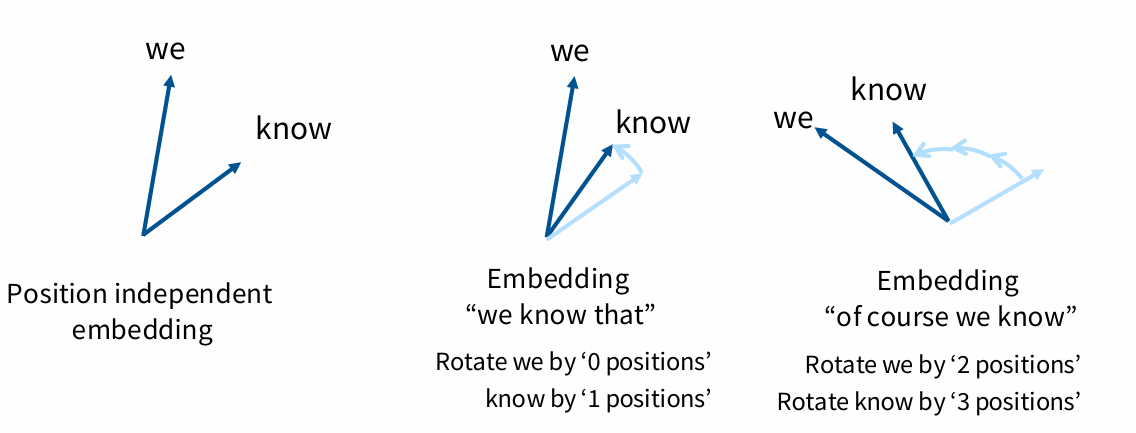旋转角度由位置信息决定，如果两者的相对位置不变，那么内积就不会改变
 - 在高维空间中不同于二维：要使用高维向量，切削成二维的块，每两个维度都旋转一个角度，需要成对的旋转，然后维度对旋转速度不同，能够捕获的位置信息的远近就不同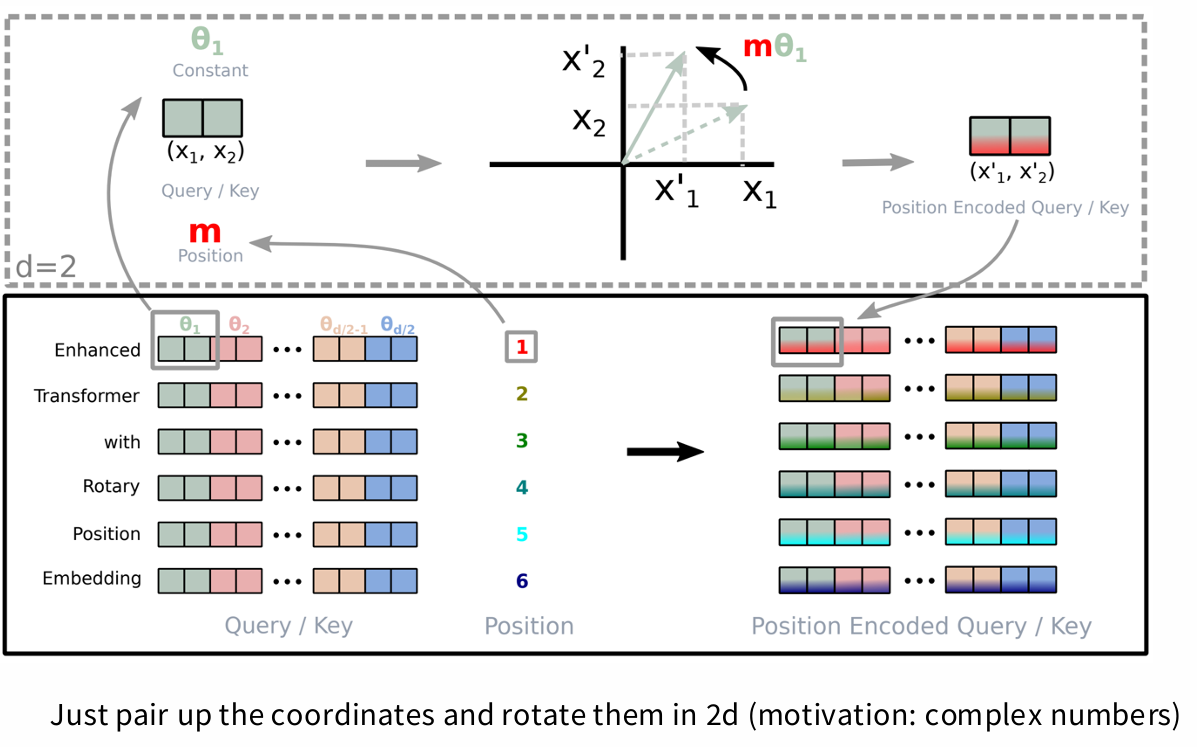用三角函数的知识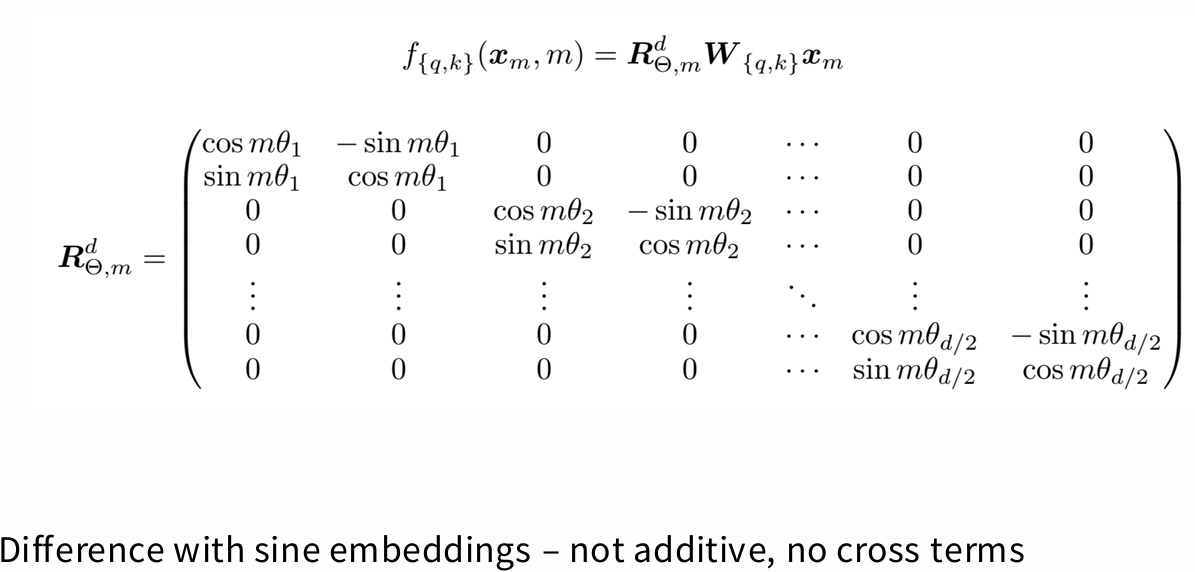

 #### 代码
 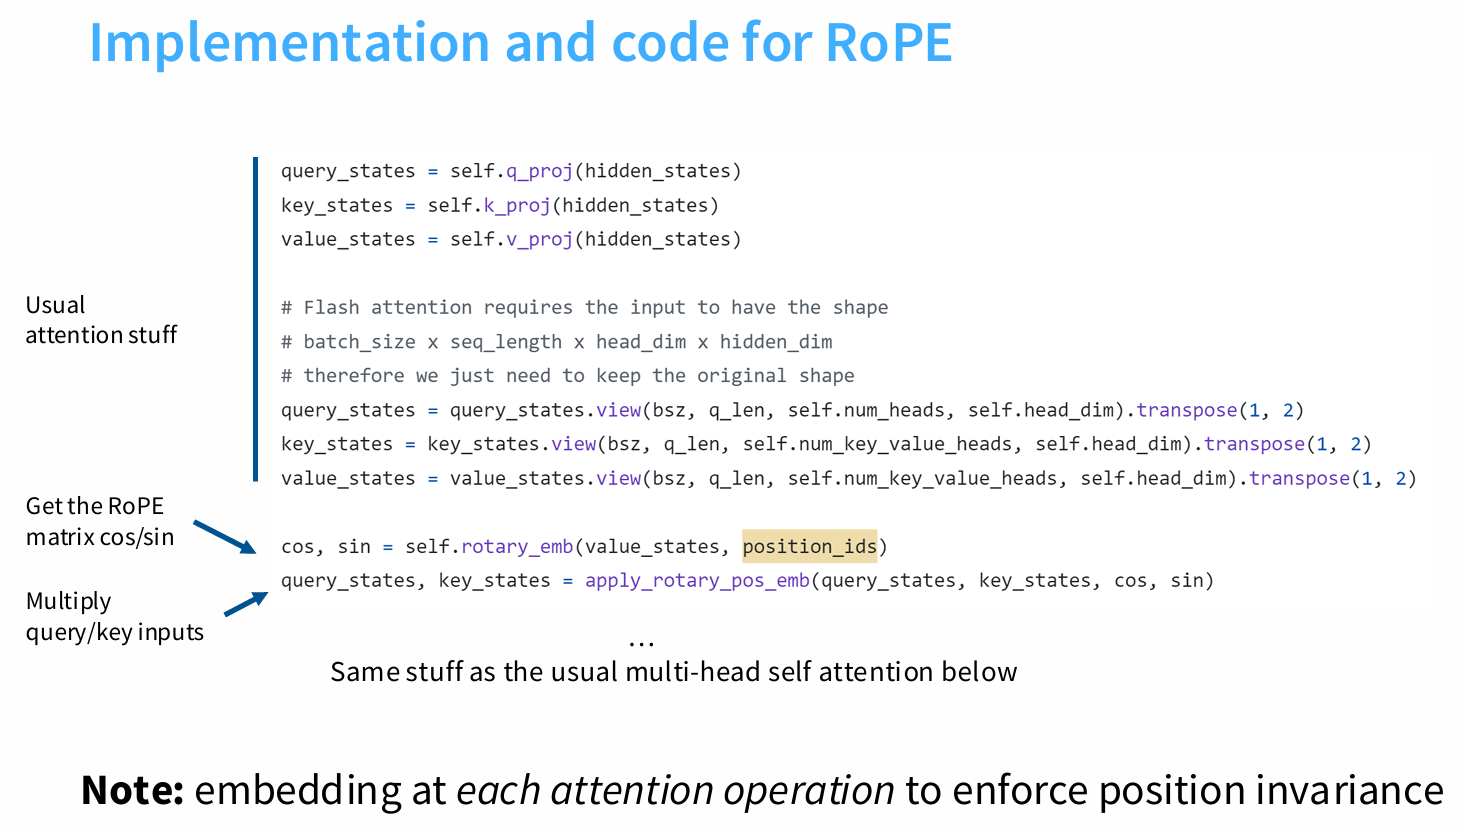
